# Binary Polarity classifier

Name - Satyam Kumar

Roll No - 2101187


In [1]:
import os
import tarfile
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download required NLTK datasets (run this only once)
nltk.download('punkt')
nltk.download('stopwords')

# Download and Extract Data
data_url = 'https://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz'
data_path = 'rt-polaritydata.tar.gz'
extracted_path = 'rt-polaritydata'
file_path='rt-polaritydata/rt-polaritydata'

[nltk_data] Downloading package punkt to /Users/lockyer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lockyer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
if not os.path.exists(extracted_path):
    # Download the dataset
    urllib.request.urlretrieve(data_url, data_path)
    
    # Extract the tar.gz file
    with tarfile.open(data_path, "r:gz") as tar:
        tar.extractall(extracted_path)

In [3]:
# Step 2: Load the Data
# def load_data(positive_file, negative_file):

#     with open(positive_file, 'r', encoding='latin-1') as pos_file:
#         positive_snippets = pos_file.readlines()

#     with open(negative_file, 'r', encoding='latin-1') as neg_file:
#         negative_snippets = neg_file.readlines()
#     return positive_snippets, negative_snippets

    
# positive_file = os.path.join(file_path, 'rt-polarity.pos')
# negative_file = os.path.join(file_path, 'rt-polarity.neg')

# positive_snippets, negative_snippets = load_data(positive_file, negative_file)

In [4]:


# Step 1: Text Preprocessing Function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Tokenize the text into words
    tokens = word_tokenize(text)
    
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming (you could use lemmatization instead)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Return the cleaned, preprocessed text as a single string
    return ' '.join(tokens)

# Step 2: Load the Data
def load_data(positive_file, negative_file):
    with open(positive_file, 'r', encoding='latin-1') as pos_file:
        positive_snippets = pos_file.readlines()

    with open(negative_file, 'r', encoding='latin-1') as neg_file:
        negative_snippets = neg_file.readlines()
    
    return positive_snippets, negative_snippets

# Load the dataset files

positive_file = os.path.join(file_path, 'rt-polarity.pos')
negative_file = os.path.join(file_path, 'rt-polarity.neg')

positive_snippets, negative_snippets = load_data(positive_file, negative_file)

# Step 3: Apply Preprocessing
positive_snippets = [preprocess_text(snippet) for snippet in positive_snippets]
negative_snippets = [preprocess_text(snippet) for snippet in negative_snippets]

# # Combine data into training/validation/test sets as needed
# X_train = positive_snippets_preprocessed[:4000] + negative_snippets_preprocessed[:4000]
# y_train = [1] * 4000 + [0] * 4000

# X_val = positive_snippets_preprocessed[4000:4500] + negative_snippets_preprocessed[4000:4500]
# y_val = [1] * 500 + [0] * 500

# X_test = positive_snippets_preprocessed[4500:] + negative_snippets_preprocessed[4500:]
# y_test = [1] * 831 + [0] * 831


In [5]:
positive_snippets

["rock destin 21st centuri 's new `` conan `` 's go make splash even greater arnold schwarzenegg jean-claud van damm steven segal",
 "gorgeous elabor continu `` lord ring `` trilog huge column word adequ describ co-writer/director peter jackson 's expand vision j r r tolkien 's middle-earth",
 'effect too-tepid biopic',
 'sometim like go movi fun wasabi good place start',
 "emerg someth rare issu movi 's honest keenli observ n't feel like one",
 'film provid great insight neurot mindset comic -- even reach absolut top game',
 'offer rare combin entertain educ',
 'perhap pictur ever made liter show road hell pave good intent',
 "steer turn snappi screenplay curl edg 's clever want hate somehow pull",
 'take care cat offer refreshingli differ slice asian cinema',
 'film well worth see talk sing head',
 'realli surpris wisegirl low-key qualiti genuin tender',
 'wendigo go cinema fed eye heart mind',
 'one greatest family-ori fantasy-adventur movi ever',
 'ultim ponder reason need stori mu

In [6]:
def print_snippet_info(snippets, label):
    sentence_count = len(snippets)  # Count number of sentences
    print(f"Number of sentences in {label} file: {sentence_count}\n")
    
    print(f"First 10 sentences from the {label} file:")
    for i, sentence in enumerate(snippets[:10]):  # Print the first 10 sentences
        print(f"{i+1}. {sentence.strip()}")
    print()  # Add a blank line for readability

# Print information for positive and negative snippets
print_snippet_info(positive_snippets, "Positive")
print_snippet_info(negative_snippets, "Negative")

Number of sentences in Positive file: 5331

First 10 sentences from the Positive file:
1. rock destin 21st centuri 's new `` conan `` 's go make splash even greater arnold schwarzenegg jean-claud van damm steven segal
2. gorgeous elabor continu `` lord ring `` trilog huge column word adequ describ co-writer/director peter jackson 's expand vision j r r tolkien 's middle-earth
3. effect too-tepid biopic
4. sometim like go movi fun wasabi good place start
5. emerg someth rare issu movi 's honest keenli observ n't feel like one
6. film provid great insight neurot mindset comic -- even reach absolut top game
7. offer rare combin entertain educ
8. perhap pictur ever made liter show road hell pave good intent
9. steer turn snappi screenplay curl edg 's clever want hate somehow pull
10. take care cat offer refreshingli differ slice asian cinema

Number of sentences in Negative file: 5331

First 10 sentences from the Negative file:
1. simplist silli tediou
2. 's laddish juvenil teenag boy coul

In [7]:
# Step 3: Split the data into train, validation, and test sets
def create_splits(pos_snippets, neg_snippets):
    # Create training set
    train_pos = pos_snippets[:4000]
    train_neg = neg_snippets[:4000]
    
    # Create validation set
    val_pos = pos_snippets[4000:4500]
    val_neg = neg_snippets[4000:4500]
    
    # Create test set
    test_pos = pos_snippets[4500:]
    test_neg = neg_snippets[4500:]
    
    # Combine and label the sets (1 for positive, 0 for negative)
    train_data = [(snippet.strip(), 1) for snippet in train_pos] + [(snippet.strip(), 0) for snippet in train_neg]
    val_data = [(snippet.strip(), 1) for snippet in val_pos] + [(snippet.strip(), 0) for snippet in val_neg]
    test_data = [(snippet.strip(), 1) for snippet in test_pos] + [(snippet.strip(), 0) for snippet in test_neg]
    
    return train_data, val_data, test_data

train_data, val_data, test_data = create_splits(positive_snippets, negative_snippets)

In [8]:
#print train data
for i,data in enumerate(train_data):
    print(data)
    if(i>5):
        break

("rock destin 21st centuri 's new `` conan `` 's go make splash even greater arnold schwarzenegg jean-claud van damm steven segal", 1)
("gorgeous elabor continu `` lord ring `` trilog huge column word adequ describ co-writer/director peter jackson 's expand vision j r r tolkien 's middle-earth", 1)
('effect too-tepid biopic', 1)
('sometim like go movi fun wasabi good place start', 1)
("emerg someth rare issu movi 's honest keenli observ n't feel like one", 1)
('film provid great insight neurot mindset comic -- even reach absolut top game', 1)
('offer rare combin entertain educ', 1)


In [9]:
# Step 4: Prepare data for model (Bag of Words)
def prepare_data(data):
    snippets, labels = zip(*data)
    return list(snippets), list(labels)

X_train, y_train = prepare_data(train_data)
X_val, y_val = prepare_data(val_data)
X_test, y_test = prepare_data(test_data)

# Convert text to numerical features using CountVectorizer (Bag of Words)
vectorizer = CountVectorizer()

X_train_counts = vectorizer.fit_transform(X_train)
X_val_counts = vectorizer.transform(X_val)
X_test_counts = vectorizer.transform(X_test)

# Step 5: Train a Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

MultinomialNB()

In [10]:
print(f"Number of words in the Vocabulary {len(vectorizer.vocabulary_)}")
print(vectorizer.vocabulary_)


Number of words in the Vocabulary 11539
{'rock': 8531, 'destin': 2704, '21st': 79, 'centuri': 1672, 'new': 6859, 'conan': 2085, 'go': 4332, 'make': 6167, 'splash': 9531, 'even': 3499, 'greater': 4449, 'arnold': 618, 'schwarzenegg': 8816, 'jean': 5468, 'claud': 1873, 'van': 10933, 'damm': 2460, 'steven': 9675, 'segal': 8905, 'gorgeous': 4377, 'elabor': 3220, 'continu': 2178, 'lord': 6025, 'ring': 8498, 'trilog': 10463, 'huge': 4935, 'column': 2006, 'word': 11393, 'adequ': 250, 'describ': 2680, 'co': 1948, 'writer': 11440, 'director': 2806, 'peter': 7487, 'jackson': 5426, 'expand': 3567, 'vision': 11061, 'tolkien': 10321, 'middle': 6429, 'earth': 3152, 'effect': 3193, 'too': 10341, 'tepid': 10133, 'biopic': 1077, 'sometim': 9422, 'like': 5922, 'movi': 6656, 'fun': 4124, 'wasabi': 11152, 'good': 4359, 'place': 7577, 'start': 9632, 'emerg': 3281, 'someth': 9420, 'rare': 8145, 'issu': 5405, 'honest': 4865, 'keenli': 5609, 'observ': 7004, 'feel': 3746, 'one': 7073, 'film': 3815, 'provid': 79

In [11]:
print(f"Total vectors in training set {len(X_train_counts.toarray())}")
print(f"Dimension of each vector {len(X_train_counts.toarray()[0])}")

print(X_train_counts.toarray())

Total vectors in training set 8000
Dimension of each vector 11539
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:

def plot_confusion_matrix(cm):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    
def evaluate_model(y_true, y_pred):
    # Calculate precision, recall, and F1 score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Print evaluation metrics
   
    print(f"True Positives (TP): {tp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    # Plot confusion matrix
    plot_confusion_matrix(cm)


Model 1: Using Naive Bayes Classifier and Bag of words feature extraction technique

Validation Set Evaluation:
True Positives (TP): 383
True Negatives (TN): 386
False Positives (FP): 114
False Negatives (FN): 117
Precision: 0.77
Recall: 0.77
F1-Score: 0.77


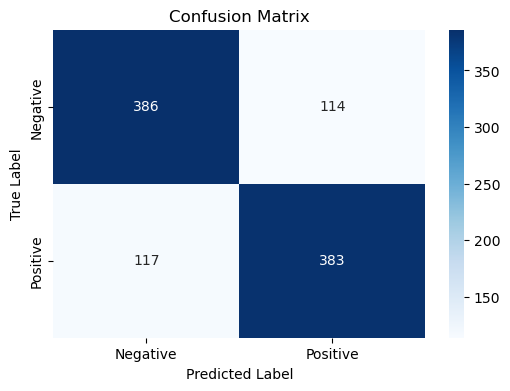


Test Set Evaluation:
True Positives (TP): 630
True Negatives (TN): 652
False Positives (FP): 179
False Negatives (FN): 201
Precision: 0.78
Recall: 0.76
F1-Score: 0.77


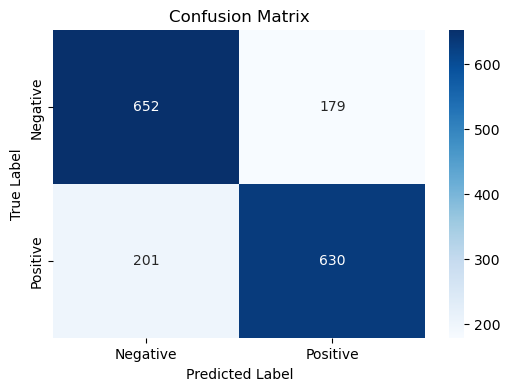

In [13]:
# Step 6: Validate the Model
y_val_pred = clf.predict(X_val_counts)

# Step 7: Evaluate the Model (on Validation Set)


print("\nModel 1: Using Naive Bayes Classifier and Bag of words feature extraction technique\n")
print(f"Validation Set Evaluation:")
evaluate_model(y_val,y_val_pred)
# Step 8: Test the Model (Final Test Evaluation)
y_test_pred = clf.predict(X_test_counts)

print("\nTest Set Evaluation:")
evaluate_model(y_test,y_test_pred)



Model 2: Using Naive Bayes Classifier and TF-IDF feature extraction technique


Validation Set Evaluation:
True Positives (TP): 392
True Negatives (TN): 383
False Positives (FP): 117
False Negatives (FN): 108
Precision: 0.77
Recall: 0.78
F1-Score: 0.78


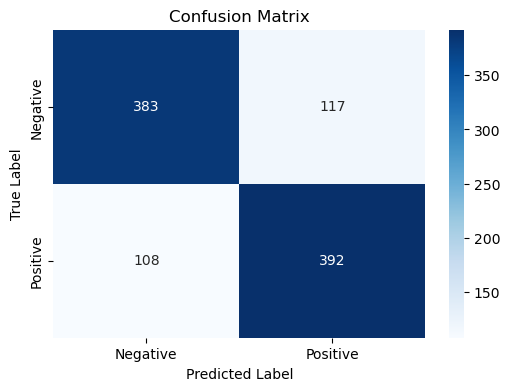


Test Set Evaluation:
True Positives (TP): 643
True Negatives (TN): 647
False Positives (FP): 184
False Negatives (FN): 188
Precision: 0.78
Recall: 0.77
F1-Score: 0.78


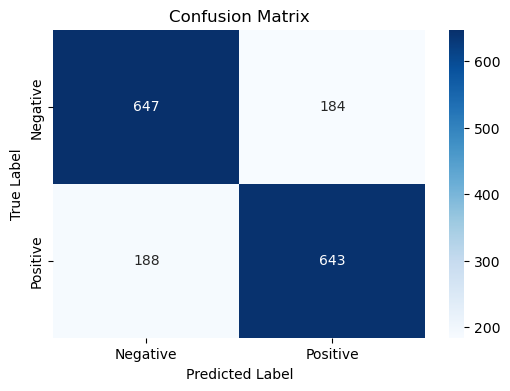

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Convert text to numerical features using TfidfVectorizer
vectorizer2 = TfidfVectorizer()

# Fit on the training data and transform it to TF-IDF features
X_train_tfidf = vectorizer2.fit_transform(X_train)

# Transform the validation and test sets without fitting again
X_val_tfidf = vectorizer2.transform(X_val)
X_test_tfidf = vectorizer2.transform(X_test)

# Step 5: Train a Naive Bayes Classifier
clf2 = MultinomialNB()
clf2.fit(X_train_tfidf, y_train)

# Optional: You can make predictions on validation or test sets
y_val_pred2 = clf2.predict(X_val_tfidf)
y_test_pred2 = clf2.predict(X_test_tfidf)

# Output the results
print("\nModel 2: Using Naive Bayes Classifier and TF-IDF feature extraction technique\n")
print("\nValidation Set Evaluation:")
evaluate_model(y_val,y_val_pred2)
print("\nTest Set Evaluation:")
evaluate_model(y_test,y_test_pred2)


Model 3: Using SVM Classifier and TF-IDF feature extraction technique


Validation Set Evaluation:
True Positives (TP): 380
True Negatives (TN): 388
False Positives (FP): 112
False Negatives (FN): 120
Precision: 0.77
Recall: 0.76
F1-Score: 0.77


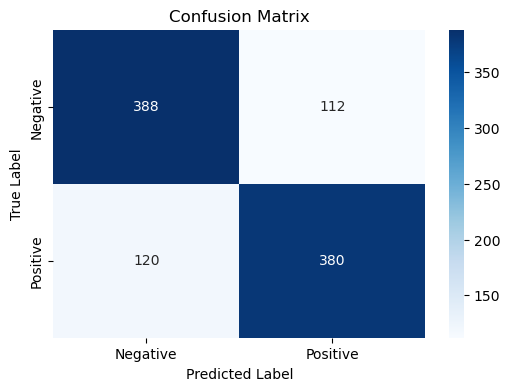


Test Set Evaluation:
True Positives (TP): 617
True Negatives (TN): 633
False Positives (FP): 198
False Negatives (FN): 214
Precision: 0.76
Recall: 0.74
F1-Score: 0.75


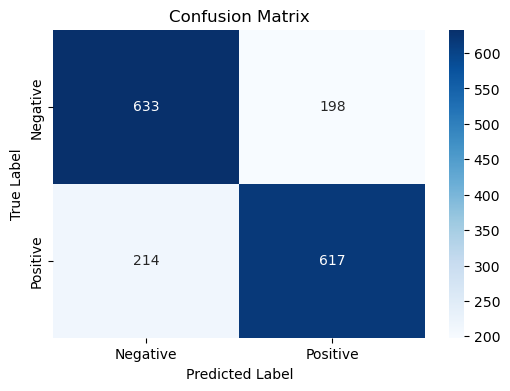

In [15]:
from sklearn.svm import SVC
#  Train an SVM Classifier
clf3 = SVC(kernel='linear')  # Linear kernel is generally used for text classification
clf3.fit(X_train_tfidf, y_train)

# Make predictions on validation and test sets
y_val_pred3 = clf3.predict(X_val_tfidf)
y_test_pred3 = clf3.predict(X_test_tfidf)

# Output the results

print("\nModel 3: Using SVM Classifier and TF-IDF feature extraction technique\n")
print("\nValidation Set Evaluation:")
evaluate_model(y_val,y_val_pred3)
print("\nTest Set Evaluation:")
evaluate_model(y_test,y_test_pred3)

Epoch 1/5
250/250 [==============================] - 6s 21ms/step - loss: 0.5791 - accuracy: 0.6964 - val_loss: 0.4945 - val_accuracy: 0.7650
Epoch 2/5
250/250 [==============================] - 4s 16ms/step - loss: 0.2260 - accuracy: 0.9154 - val_loss: 0.5749 - val_accuracy: 0.7690
Epoch 3/5
250/250 [==============================] - 4s 17ms/step - loss: 0.0413 - accuracy: 0.9866 - val_loss: 1.0999 - val_accuracy: 0.7570
Epoch 4/5
250/250 [==============================] - 4s 16ms/step - loss: 0.0065 - accuracy: 0.9979 - val_loss: 1.6509 - val_accuracy: 0.7500
Epoch 5/5
32/32 [==============================] - 0s 5ms/step

Model 4: Using TfidfVectorizer with Deep Learning


Validation Set Evaluation:
True Positives (TP): 364
True Negatives (TN): 382
False Positives (FP): 118
False Negatives (FN): 136
Precision: 0.76
Recall: 0.73
F1-Score: 0.74


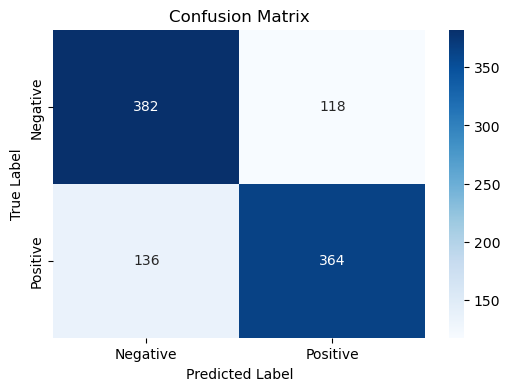


Test Set Evaluation:
True Positives (TP): 602
True Negatives (TN): 645
False Positives (FP): 186
False Negatives (FN): 229
Precision: 0.76
Recall: 0.72
F1-Score: 0.74


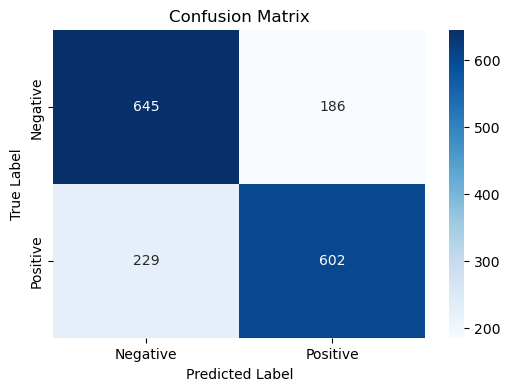

In [16]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping


# Convert text to numerical features using TfidfVectorizer
# vectorizer2 = TfidfVectorizer(max_features=15000)  # Limit features to 5000 for better performance
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_val_tfidf = vectorizer.transform(X_val).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Convert labels to numpy arrays (for compatibility with Keras)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Build the deep learning model
model = Sequential()

# Input Layer
model.add(Dense(512, input_shape=(X_train_tfidf.shape[1],), activation='relu'))

# Hidden Layer 1 with Dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

# Hidden Layer 2
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification (0/1)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_tfidf, y_train, validation_data=(X_val_tfidf, y_val), epochs=5, batch_size=32)

# Function to evaluate and print results
# def evaluate_model(true_labels, predicted_labels):
#     precision = precision_score(true_labels, predicted_labels)
#     recall = recall_score(true_labels, predicted_labels)
#     f1 = f1_score(true_labels, predicted_labels)
#     cm = confusion_matrix(true_labels, predicted_labels)

#     tn, fp, fn, tp = cm.ravel()

#     print(f"True Positives (TP): {tp}")
#     print(f"True Negatives (TN): {tn}")
#     print(f"False Positives (FP): {fp}")
#     print(f"False Negatives (FN): {fn}")
#     print(f"Precision: {precision:.2f}")
#     print(f"Recall: {recall:.2f}")
#     print(f"F1-Score: {f1:.2f}")

# Predict on the test set
y_test_pred2 = (model.predict(X_test_tfidf) > 0.5).astype("int32")
y_val_pred2 = (model.predict(X_val_tfidf) > 0.5).astype("int32")

# Output the results

print("\nModel 4: Using TfidfVectorizer with Deep Learning\n")
print("\nValidation Set Evaluation:")
evaluate_model(y_val, y_val_pred2)
print("\nTest Set Evaluation:")
evaluate_model(y_test, y_test_pred2)


Epoch 1/10
125/125 [==============================] - 1s 8ms/step - loss: 0.7328 - accuracy: 0.6453 - val_loss: 0.6153 - val_accuracy: 0.7390
Epoch 2/10
125/125 [==============================] - 1s 8ms/step - loss: 0.5657 - accuracy: 0.8075 - val_loss: 0.6260 - val_accuracy: 0.7810
Epoch 3/10
125/125 [==============================] - 1s 8ms/step - loss: 0.4764 - accuracy: 0.8712 - val_loss: 0.6770 - val_accuracy: 0.7630
Epoch 4/10
32/32 [==============================] - 0s 2ms/step

Model 5: Using TfidfVectorizer with Deep Learning and regularization to prevent overfitting


Validation Set Evaluation:
True Positives (TP): 409
True Negatives (TN): 330
False Positives (FP): 170
False Negatives (FN): 91
Precision: 0.71
Recall: 0.82
F1-Score: 0.76


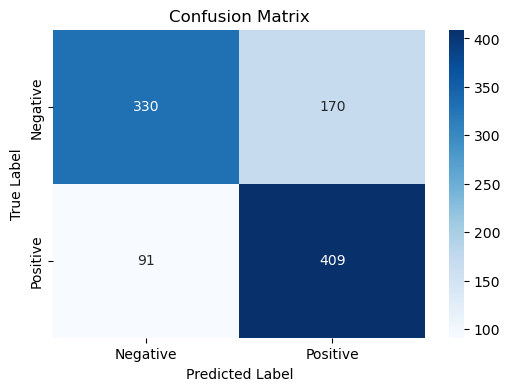


Test Set Evaluation:
True Positives (TP): 655
True Negatives (TN): 562
False Positives (FP): 269
False Negatives (FN): 176
Precision: 0.71
Recall: 0.79
F1-Score: 0.75


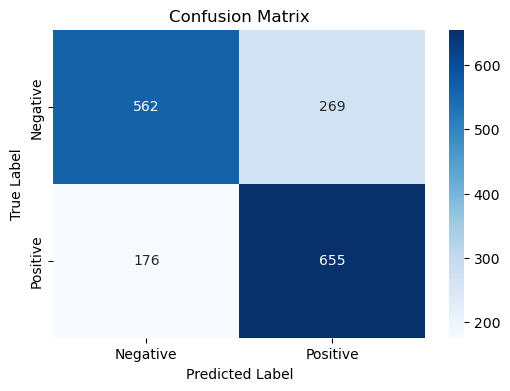

In [17]:


# Step 1: Define the deep learning model with dropout and L2 regularization
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),  # Another Dropout layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 2: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Add EarlyStopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Step 4: Train the model with early stopping
history = model.fit(
    X_train_tfidf, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val_tfidf, y_val),
    callbacks=[early_stopping]  # Use early stopping to prevent overfitting
)

# Step 5: Evaluate the model on the test set

y_test_pred3 = (model.predict(X_test_tfidf) > 0.5).astype(int)  
y_val_pred3 = (model.predict(X_val_tfidf) > 0.5).astype(int)    

# Step 6: Evaluation

print("\nModel 5: Using TfidfVectorizer with Deep Learning and regularization to prevent overfitting\n")
print("\nValidation Set Evaluation:")
evaluate_model(y_val, y_val_pred3)
print("\nTest Set Evaluation:")
evaluate_model(y_test, y_test_pred3)
